<a href="https://colab.research.google.com/github/oumaimaoubaha/tp-email-automation-brevo/blob/main/Analyse_sociale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports & Chargement du dataset

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

df = pd.read_csv("social_posts.csv")

df.head()


,post_id,date,platform,content_type,likes,comments,shares,reach,impressions
0,1,2025-01-15 09:00:00,Instagram,carousel,450,23,12,8500,12000
1,2,2025-01-15 14:00:00,Facebook,image,320,15,8,6200,9500
2,3,2025-01-15 18:00:00,LinkedIn,article,180,42,25,5400,7800
3,4,2025-01-16 10:00:00,Instagram,reel,890,67,45,15000,22000
4,5,2025-01-16 13:00:00,Twitter,text,210,34,56,7800,11000


#Nettoyage & Préparation

In [4]:
df["date"] = pd.to_datetime(df["date"])

df["hour"] = df["date"].dt.hour

df["engagement_rate"] = (df["likes"] + df["comments"] + df["shares"]) / df["impressions"]

df


,post_id,date,platform,content_type,likes,comments,shares,reach,impressions,hour,engagement_rate
0,1,2025-01-15 09:00:00,Instagram,carousel,450,23,12,8500,12000,9,0.040417
1,2,2025-01-15 14:00:00,Facebook,image,320,15,8,6200,9500,14,0.036105
2,3,2025-01-15 18:00:00,LinkedIn,article,180,42,25,5400,7800,18,0.031667
3,4,2025-01-16 10:00:00,Instagram,reel,890,67,45,15000,22000,10,0.045545
4,5,2025-01-16 13:00:00,Twitter,text,210,34,56,7800,11000,13,0.027273
5,6,2025-01-16 19:00:00,Instagram,story,340,12,0,9200,9200,19,0.038261
6,7,2025-01-17 08:00:00,LinkedIn,image,420,38,18,9500,13000,8,0.036615
7,8,2025-01-17 12:00:00,Facebook,video,680,54,32,11000,16500,12,0.046424
8,9,2025-01-17 17:00:00,Instagram,image,520,29,14,9800,14200,17,0.039648
9,10,2025-01-18 09:30:00,Twitter,image,380,28,41,8900,12800,9,0.035078


#Statistiques générales

In [5]:
print("📊 Nombre total de posts :", len(df))
print("📈 Reach moyen :", df["reach"].mean())
print("🔥 Engagement moyen :", df["engagement_rate"].mean())
print("🏆 Plateforme la plus utilisée :", df["platform"].mode()[0])


📊 Nombre total de posts : 30
📈 Reach moyen : 10193.333333333334
🔥 Engagement moyen : 0.03968825905084279
🏆 Plateforme la plus utilisée : Instagram


#Meilleures heures pour publier

In [6]:
hour_perf = df.groupby("hour")["engagement_rate"].mean().sort_values(ascending=False)
hour_perf


,engagement_rate
hour,
16,0.049143
11,0.047281
10,0.045127
19,0.042559
12,0.042334
15,0.042002
17,0.041597
7,0.039037
18,0.038540


#Visualisation : Engagement par heure

/tmp/ipython-input-1330074490.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="hour", y="engagement_rate", palette="viridis")


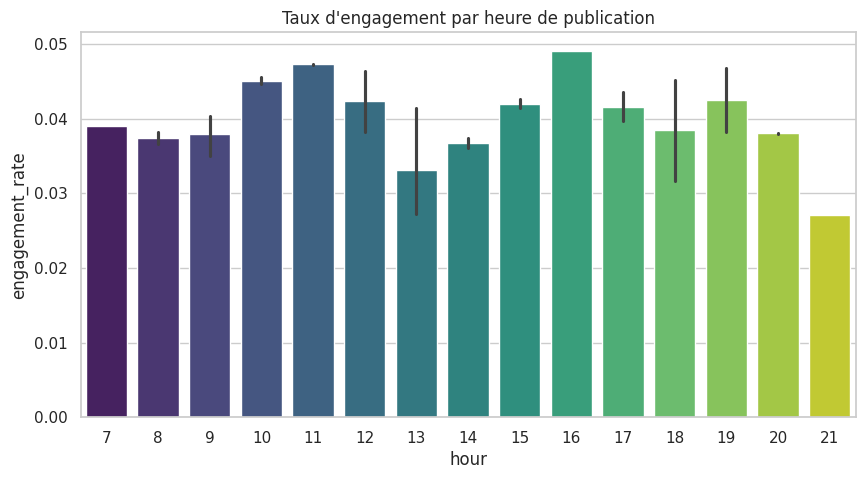

In [7]:
sns.barplot(data=df, x="hour", y="engagement_rate", palette="viridis")
plt.title("Taux d'engagement par heure de publication")
plt.show()


#Engagement par plateforme

/tmp/ipython-input-4120775304.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="platform", y="engagement_rate", palette="mako")


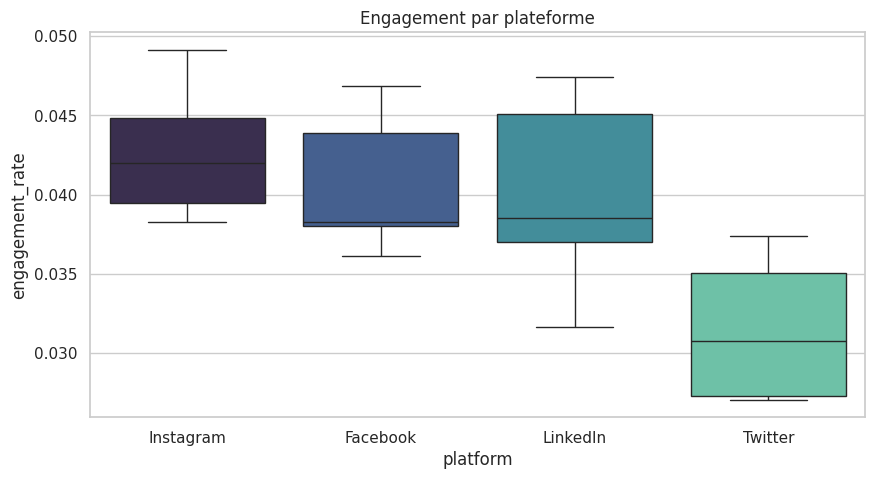

In [8]:
sns.boxplot(data=df, x="platform", y="engagement_rate", palette="mako")
plt.title("Engagement par plateforme")
plt.show()


#Évolution de l'engagement dans le temps

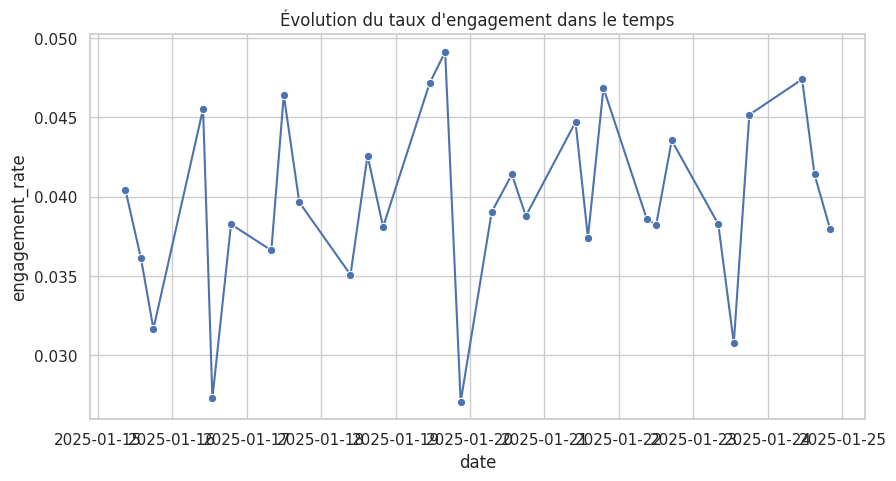

In [9]:
sns.lineplot(data=df, x="date", y="engagement_rate", marker="o")
plt.title("Évolution du taux d'engagement dans le temps")
plt.show()


#Analyse du contenu performant

In [10]:
content_perf = df.groupby("content_type")["engagement_rate"].mean().sort_values(ascending=False)
content_perf


,engagement_rate
content_type,
video,0.046961
reel,0.046142
carousel,0.041990
story,0.038416
image,0.037981
article,0.035225
text,0.032235
